In [2]:
import pandas
import matplotlib
import matplotlib.pyplot as pyplot
import scipy.stats as stats
import seaborn
%matplotlib inline
from data.textile_dataframes import balanced, unbalanced, narrow_bands, middle_bands, wide_bands, dataframe

"""
Датафреймы:
balanced
unbalanced
narrow_bands
middle_bands
wide_bands
"""



In [3]:
# все бинты (всех типов)
all_bands = pandas.concat([narrow_bands, middle_bands, wide_bands])
all_bands_number = len(all_bands)


In [4]:
#print(dataframe['density_coefficient'])
#print(dataframe[dataframe.density_coefficient == 'NaN'])


(array([1., 3., 0., 1., 6., 6., 8., 7., 0., 8.]),
 array([0.88 , 0.952, 1.024, 1.096, 1.168, 1.24 , 1.312, 1.384, 1.456,
        1.528, 1.6  ]),
 <a list of 10 Patch objects>)

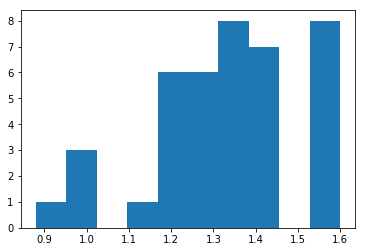

In [5]:
# matplotlib charts
pyplot.hist(balanced['density_coefficient'])


(array([56., 54., 33., 33., 27., 15.,  5.,  1.,  2.,  1.]),
 array([1.22 , 1.658, 2.096, 2.534, 2.972, 3.41 , 3.848, 4.286, 4.724,
        5.162, 5.6  ]),
 <a list of 10 Patch objects>)

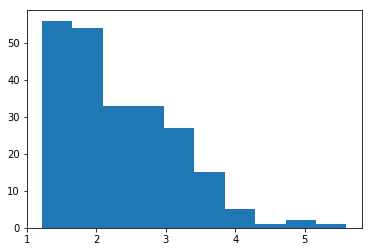

In [6]:
pyplot.hist(unbalanced['density_coefficient'])


(array([28., 83., 51., 40., 34., 19.,  6.,  3.,  2.,  1.]),
 array([0.88 , 1.352, 1.824, 2.296, 2.768, 3.24 , 3.712, 4.184, 4.656,
        5.128, 5.6  ]),
 <a list of 10 Patch objects>)

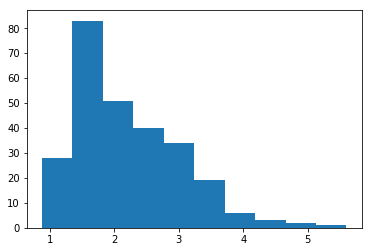

In [7]:
pyplot.hist(dataframe['density_coefficient'])


(array([25., 36., 87., 73., 22., 15.,  2.,  3.,  2.,  2.]),
 array([0.2  , 0.295, 0.39 , 0.485, 0.58 , 0.675, 0.77 , 0.865, 0.96 ,
        1.055, 1.15 ]),
 <a list of 10 Patch objects>)

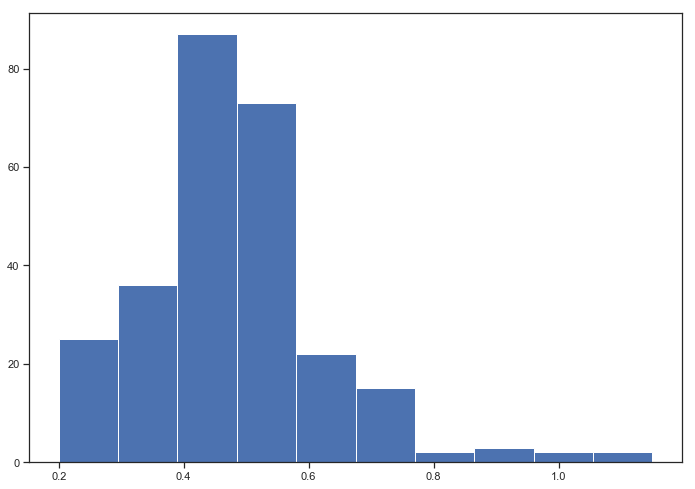

In [34]:
pyplot.hist(dataframe['warp_mean'])


(array([185.,  76.,   2.,   2.,   1.,   0.,   0.,   0.,   0.,   1.]),
 array([0.15 , 0.565, 0.98 , 1.395, 1.81 , 2.225, 2.64 , 3.055, 3.47 ,
        3.885, 4.3  ]),
 <a list of 10 Patch objects>)

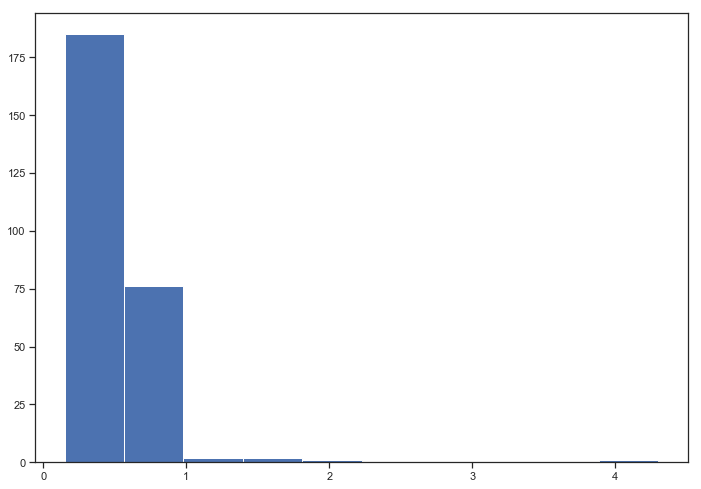

In [35]:
pyplot.hist(dataframe['weft_mean'])


/Users/streltcov/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


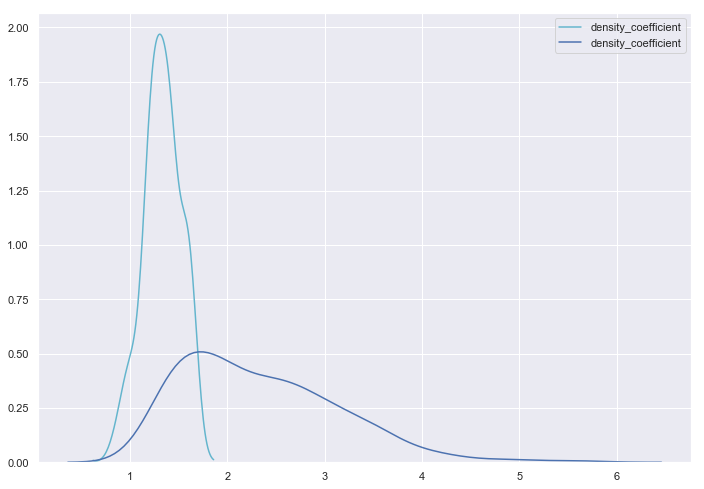

In [8]:
seaborn.set_style("whitegrid")
seaborn.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})
seaborn.set(rc={'figure.figsize': (11.7,8.27)})
densities_balanced = seaborn.kdeplot(balanced['density_coefficient'], color='c')
densities_unbalanced = seaborn.kdeplot(unbalanced['density_coefficient'], color='b')


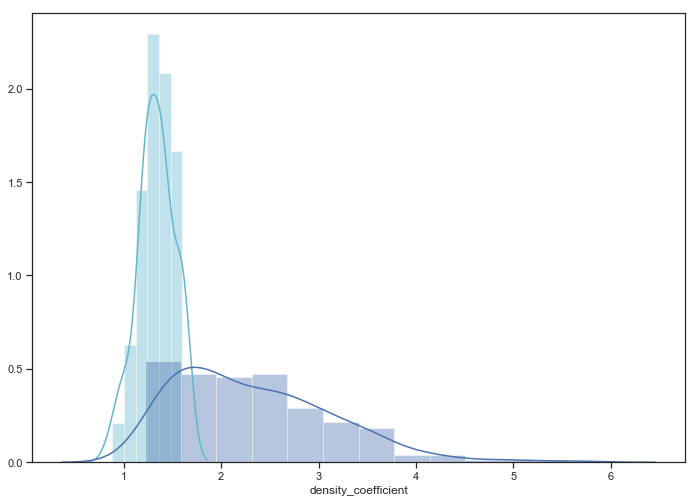

In [9]:
# seaborn charts
seaborn.set_style("whitegrid")
seaborn.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})
densities_balanced = seaborn.distplot(balanced['density_coefficient'], kde=True, color='c')
densities_unbalanced = seaborn.distplot(unbalanced['density_coefficient'], kde=True, color='b')


In [37]:
shapiro_warp_mean = stats.shapiro(dataframe['warp_mean'].values)
shapiro_weft_mean = stats.shapiro(dataframe['weft_mean'].values)
shapiro_dens_coeff = stats.shapiro(dataframe['density_coefficient'].values)
pearson_warp_weft_dens = stats.pearsonr(dataframe['warp_mean'], dataframe['weft_mean'])


##### Коэффициент корреляции для плотностей по основе и утку:


In [23]:
print(pearson_warp_weft_dens)

##### Проверки на нормальность распределения толщин нитей по основе и по утку:


(0.48897522780799724, 1.869552849160922e-17)


In [40]:
print('{:.20f}'.format(shapiro_warp_mean[1]))
print('{:.20f}'.format(shapiro_weft_mean[1]))


0.00000000000624036369
0.00000000000000000000


##### Проверка "коэффициента плотности" на нормальность распределения:

In [33]:
print(float(shapiro_dens_coeff[1]))
print('{:.20f}'.format(shapiro_dens_coeff[1]))

1.364115209678829e-10
0.00000000013641152097
